In [6]:
# Clustering
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
iris.shape

(150, 5)

In [8]:
# split the train data into independent variables (X) and dependent variable (Y)
x_iris = iris.drop('species', axis = 1)
print(x_iris.shape)
y_iris = iris['species']
print(y_iris.shape)
print(type(x_iris))
print(type(y_iris))

(150, 4)
(150,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [9]:
# calculate distance
from scipy.spatial.distance import pdist
x_dist = pdist(x_iris)
print(x_dist)

[0.53851648 0.50990195 0.64807407 ... 0.6164414  0.64031242 0.76811457]


In [10]:
x_dist.shape

(11175,)

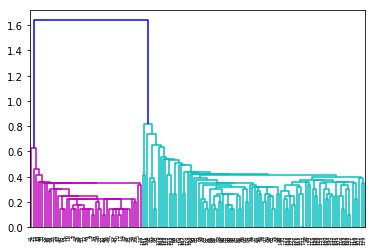

In [11]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
x_dendo = hierarchy.linkage(x_dist, 'single')
plt.figure()
dn = hierarchy.dendrogram(x_dendo)
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
plt.show()

In [12]:
# apply Gaussian Mixture model to group the data
from sklearn.cluster import AgglomerativeClustering
AHC = AgglomerativeClustering(n_clusters = 3,linkage='ward')
AHC.fit(x_iris)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func='deprecated')

In [13]:
print(AHC.labels_)
print(AHC.n_leaves_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
150


In [9]:
print(AHC.n_components_)

1


In [10]:
# order of merging
print(AHC.children_)

[[101 142]
 [  7  39]
 [  0  17]
 [  9  34]
 [128 132]
 [ 10  48]
 [ 40 152]
 [  4  37]
 [ 19  21]
 [156 157]
 [ 29  30]
 [ 57  93]
 [ 80  81]
 [116 137]
 [  8  38]
 [ 46 158]
 [151 159]
 [ 49 166]
 [ 27  28]
 [  1 153]
 [  3  47]
 [ 82  92]
 [ 95  96]
 [127 138]
 [  2 170]
 [ 45 169]
 [ 12 175]
 [167 168]
 [160 176]
 [ 99 172]
 [ 63  91]
 [ 65  75]
 [ 25 178]
 [ 69 162]
 [123 126]
 [112 139]
 [174 182]
 [ 94 179]
 [ 88 187]
 [ 66  84]
 [ 78 180]
 [ 23  26]
 [ 42 164]
 [ 53  89]
 [ 74  97]
 [186 192]
 [ 11 195]
 [  6 196]
 [ 35 177]
 [155 198]
 [ 43 191]
 [ 73 190]
 [ 70 173]
 [199 200]
 [197 203]
 [110 147]
 [120 143]
 [136 148]
 [ 58 181]
 [183 193]
 [ 67 171]
 [ 54 208]
 [146 184]
 [165 204]
 [103 163]
 [140 144]
 [ 13 213]
 [141 145]
 [202 212]
 [188 210]
 [ 68  87]
 [194 211]
 [113 150]
 [ 90 219]
 [ 50  52]
 [209 223]
 [ 51  56]
 [107 130]
 [206 215]
 [105 122]
 [149 218]
 [ 20  31]
 [ 86 224]
 [ 24 216]
 [124 228]
 [ 36 233]
 [231 235]
 [ 61 225]
 [115 207]
 [104 154]
 [ 55 189]

In [15]:
# include new column 'cluster' to iris data
iris ["cluster"] = AHC.labels_
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species  cluster
0           5.1          3.5           1.4          0.2  setosa        1
1           4.9          3.0           1.4          0.2  setosa        1
2           4.7          3.2           1.3          0.2  setosa        1
3           4.6          3.1           1.5          0.2  setosa        1
4           5.0          3.6           1.4          0.2  setosa        1


In [17]:
print(type(iris))

<class 'pandas.core.frame.DataFrame'>


In [16]:
import pandas as pd
pd.unique(iris["cluster"])

array([1, 0, 2], dtype=int64)

In [13]:
pd.unique(iris["species"])

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [19]:
iris[(iris.species == "virginica")]

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
100,6.3,3.3,6.0,2.5,virginica,2
101,5.8,2.7,5.1,1.9,virginica,0
102,7.1,3.0,5.9,2.1,virginica,2
103,6.3,2.9,5.6,1.8,virginica,2
104,6.5,3.0,5.8,2.2,virginica,2
105,7.6,3.0,6.6,2.1,virginica,2
106,4.9,2.5,4.5,1.7,virginica,0
107,7.3,2.9,6.3,1.8,virginica,2
108,6.7,2.5,5.8,1.8,virginica,2
109,7.2,3.6,6.1,2.5,virginica,2


In [3]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import numpy as np

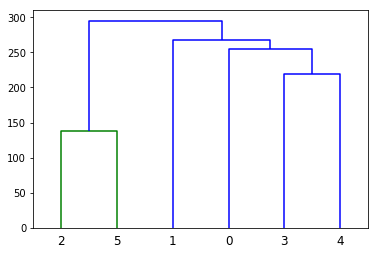

In [4]:
# example 2
ytdist = np.array([662., 877., 255., 412., 996., 295., 468., 268.,
                   400., 754., 564., 138., 219., 869., 669.])
Z = hierarchy.linkage(ytdist, 'single')
plt.figure()
dn = hierarchy.dendrogram(Z)
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
#fig, axes = plt.subplots(1, 2, figsize=(8, 3))
#dn1 = hierarchy.dendrogram(Z, ax=axes[0], above_threshold_color='y',orientation='top')
#dn2 = hierarchy.dendrogram(Z, ax=axes[1],above_threshold_color='#bcbddc',orientation='right')
#hierarchy.set_link_color_palette(None)
plt.show()

In [20]:
Z

array([[   2.,    5.,  138.,    2.],
       [   3.,    4.,  219.,    2.],
       [   0.,    7.,  255.,    3.],
       [   1.,    8.,  268.,    4.],
       [   6.,    9.,  295.,    6.]])

In [22]:
ytdist.shape

(15,)

In [5]:
x = np.array([1,1,3,1,2.5,2])
x.resize(3,2)
print(x)
print(x.shape)

[[ 1.   1. ]
 [ 3.   1. ]
 [ 2.5  2. ]]
(3, 2)


In [6]:
y = hierarchy.linkage(x, 'single')
print(y)

[[ 1.          2.          1.11803399  2.        ]
 [ 0.          3.          1.80277564  3.        ]]


In [47]:
from scipy.spatial.distance import pdist
y = pdist(x)
print(y)

[ 2.          1.80277564  1.11803399]


In [48]:
z = hierarchy.linkage(y, 'single')
print(z)

[[ 1.          2.          1.11803399  2.        ]
 [ 0.          3.          1.80277564  3.        ]]


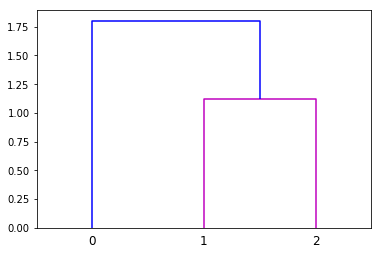

In [49]:
dn = hierarchy.dendrogram(z)
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
plt.show()

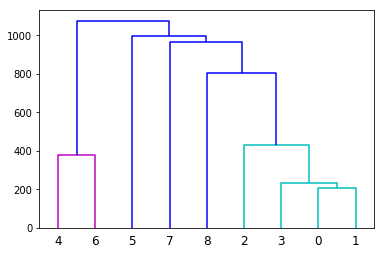

In [5]:
#Examnple - 3
import numpy as np
ytdist = np.array([206, 429, 233, 1504, 1308, 1075, 963, 802, 671, 
                   1329, 2976, 2815, 2684, 3273, 2013, 3095, 2934, 2799,
                   3053, 2142, 808, 2979, 2786, 2631, 2687, 2054, 1131,
                   379, 1949, 1771, 1616, 2037, 996, 1307, 1235, 1059])
from scipy.cluster import hierarchy
Z = hierarchy.linkage(ytdist, 'single')
plt.figure()
dn = hierarchy.dendrogram(Z)
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
plt.show()

In [52]:
Z

array([[  0.00000000e+00,   1.00000000e+00,   2.06000000e+02,
          2.00000000e+00],
       [  3.00000000e+00,   9.00000000e+00,   2.33000000e+02,
          3.00000000e+00],
       [  4.00000000e+00,   6.00000000e+00,   3.79000000e+02,
          2.00000000e+00],
       [  2.00000000e+00,   1.00000000e+01,   4.29000000e+02,
          4.00000000e+00],
       [  8.00000000e+00,   1.20000000e+01,   8.02000000e+02,
          5.00000000e+00],
       [  7.00000000e+00,   1.30000000e+01,   9.63000000e+02,
          6.00000000e+00],
       [  5.00000000e+00,   1.40000000e+01,   9.96000000e+02,
          7.00000000e+00],
       [  1.10000000e+01,   1.50000000e+01,   1.07500000e+03,
          9.00000000e+00]])